### Multi-layer Perceptron (MLP)

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

In [3]:
df = pd.read_csv('dataset_final_para_modelo.csv')

In [4]:
# --- PREPARAÇÃO DOS DADOS (Incluindo features cíclicas e temporais) ---

# Adiciona hora_sin/cos
#df['hora_sin'] = np.sin(2 * np.pi * df['hora'].replace(-1, np.nan) / 24.0)
#df['hora_cos'] = np.cos(2 * np.pi * df['hora'].replace(-1, np.nan) / 24.0)

# Preenche NaNs nas colunas cíclicas e na tipo_via_num (assumindo que já foi tratada com -1)
#df['hora_sin'].fillna(0, inplace=True)
#df['hora_cos'].fillna(0, inplace=True)
# Se 'tipo_via_num' ainda puder ter NaN (ex: no dataset completo), preencha aqui também
df['tipo_via_num'].fillna(-1, inplace=True) # Exemplo

# Seleciona as features finais (numéricas)
X = df.drop(columns=['Sinistro', 'data'])
y = df['Sinistro']

# Garante que X contém apenas colunas numéricas (importante para o scaler)
X = X.select_dtypes(include=np.number)
df

C:\Users\pirsp\AppData\Local\Temp\ipykernel_28652\2027913158.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['tipo_via_num'].fillna(-1, inplace=True) # Exemplo


,latitude,longitude,data,dia_semana,mes,is_weekend,hora,Sinistro,Chuva,tipo_via_num,tp_veiculo_bicicleta,tp_veiculo_caminhao,tp_veiculo_motocicleta,tp_veiculo_nao_disponivel,tp_veiculo_onibus,tp_veiculo_outros,tp_veiculo_automovel
0,"-22,37045444699761","-49,05124633197233",2025-09-01,0,9,0,2,0,0,"1,0",0,0,0,0,0,0,0
1,"-22,3719949398121","-49,025239973547635",2025-08-22,4,8,0,11,0,0,"0,0",0,0,0,0,0,0,0
2,"-22,34020677","-49,11401671",2025-12-02,1,12,0,23,0,0,"0,0",0,0,0,0,0,0,0
3,"-22,33246605711713","-49,05612892846074",2024-04-23,1,4,0,17,0,1,"0,0",0,0,0,0,0,0,0
4,"-22,32344905","-49,05825466",2023-07-26,2,7,0,7,1,0,"0,0",0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24562,"-22,39921817504342","-49,01614986243158",2023-01-03,1,1,0,11,0,1,"1,0",0,0,0,0,0,0,0
24563,"-22,31586284","-49,04354563",2022-08-18,3,8,0,22,1,0,"0,0",0,0,0,0,0,0,0
24564,"-22,33642","-49,1000874",2024-04-19,4,4,0,6,1,0,"0,0",0,0,0,0,0,0,0
24565,"-22,30495851","-49,09858915",2022-09-24,5,9,1,17,1,0,"0,0",0,0,0,0,0,0,0


Escalonando os dados...
Dados escalonados.
Inicializando o modelo MLP...
Treinando o modelo MLP (pode demorar)...
Treinamento concluído.

--- Avaliação do Modelo MLP ---

--- Matriz de Confusão (MLP) ---

--- Relatório de Classificação (MLP) ---
              precision    recall  f1-score   support

           0       0.83      0.93      0.88      4914
           1       0.81      0.63      0.71      2457

    accuracy                           0.83      7371
   macro avg       0.82      0.78      0.79      7371
weighted avg       0.83      0.83      0.82      7371

--- AUC (MLP) ---
0.8560


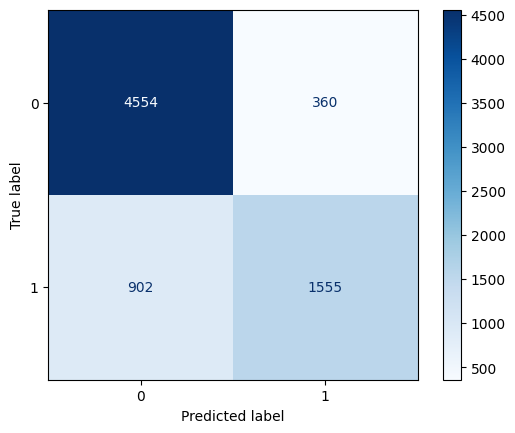

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=8, stratify=y
)

# --- ESCALONAMENTO DOS DADOS (OBRIGATÓRIO PARA MLP) ---
print("Escalonando os dados...")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("Dados escalonados.")

smote = SMOTE(random_state=8)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# --- TREINAMENTO DO MODELO MLP ---

# 1. Inicializa o MLPClassifier
#    hidden_layer_sizes=(100, 50): Define a arquitetura - duas camadas ocultas, a 1ª com 100 neurónios, a 2ª com 50.
#    activation='relu': Função de ativação comum e eficaz.
#    solver='adam': O otimizador padrão e geralmente bom.
#    alpha=0.0001: Termo de regularização L2 para evitar overfitting.
#    max_iter=500: Número máximo de épocas de treino.
#    random_state=8: Para reprodutibilidade.
#    early_stopping=True: Para o treino se a performance não melhorar, evitando overfitting.
print("Inicializando o modelo MLP...")
mlp_model = MLPClassifier(
    hidden_layer_sizes=(100, 50),
    activation='relu',
    solver='adam',
    alpha=0.0001,
    max_iter=500,
    random_state=8,
    early_stopping=True, # Importante para evitar overfitting
    n_iter_no_change=10 # Número de iterações sem melhora antes de parar
)

# 2. Treina o modelo com os dados ESCALONADOS
print("Treinando o modelo MLP (pode demorar)...")
mlp_model.fit(X_train_resampled, y_train_resampled)
print("Treinamento concluído.")

# 3. Faz as previsões e avalia, usando os dados de teste ESCALONADOS
print("\n--- Avaliação do Modelo MLP ---")
y_pred_mlp = mlp_model.predict(X_test_scaled)

print("\n--- Matriz de Confusão (MLP) ---")
cm = confusion_matrix(y_test, y_pred_mlp)
ConfusionMatrixDisplay(cm).plot(cmap=plt.cm.Blues)

print("\n--- Relatório de Classificação (MLP) ---")
print(classification_report(y_test, y_pred_mlp))

# Calcula a AUC (requer probabilidades)
y_prob_mlp = mlp_model.predict_proba(X_test_scaled)[:, 1]
auc_mlp = roc_auc_score(y_test, y_prob_mlp)
print(f"--- AUC (MLP) ---")
print(f"{auc_mlp:.4f}")